# PA 2: Classification - Decision Tree

## Student Details
Student Name and ID:Rachakonda Sravan Kumar - 1001824673; <----- Only this student will submit the assignment

Student Name and ID:Srikala Challagundla - 1001828083


Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions


Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-50 points]


## Programming Assignment Details


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Heart dataset from cardio_train.csv  [2 points]


2) Create a dataframe and print the first and last five records of your dataset.  [2 points]


3) Print the class labels.  [2 points]


4) Split your dataset 70% for training, and 30% for testing the classifier.  [2 points]


# DecisionTree
1) Use gini and entropy to measure the quality of a split.  [2.5 points]


2) Use comments to explain your code and variable names. [1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [2.5 points]


4) Print the decision tree visualization.  [5 points]


# Naive Bayes


1) Use Naive bayes classifier (Gaussian) to predict the test data[2.5 point] 


2) Use comments to explain your code and variable names[1 point]


3) Calculate and print the confusion matrix, and the classification Report (includes: precision, recall, f1-score, and support).  [2.5 points]


## Report


1) Describe the Decision Tree methods, and Naive Bayes classifier. Dont copy paste it from the internet. Write it on your own.  [5 points]


2) Describe the datasets [5 points] and if you have done any pre-processing , and your code. [2 points]


3) Visualization of the decision tree for gini and entropy.[8 points]


4) Interpret your results, and do not forget to compare gini and entropy [10 points]

Do not to forget to cite your sources!


Step 3: Save your report file as 'yourLastName_Last4digitsofyourID_DT.doc'  [1 point]

Step 4: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn.

# - - - - - - - - - - - - - - - Solution - - - - - - - - - - - - - - - - - - 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import pydotplus
from IPython.display import Image  
from sklearn import tree


from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

In [2]:
heart_data = pd.read_csv('cardio_train.csv', encoding='latin1')

#prints the first 5 rows of the dataset
heart_data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [3]:
#prints the last 5 rows of the dataset
heart_data.tail()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
69995,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69996,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69997,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69998,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1
69999,99999;20540;1;170;72.0;120;80;2;1;0;0;1;0


In [4]:
heart_data[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']] = heart_data['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'].str.split(";",expand=True,)

In [5]:
del heart_data['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio']

In [6]:
heart_data.head() #printing the first 5 columns of the given dataset after preprocessing

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
heart_data.tail() #printing the last 5 columns of the given dataset after preprocessing

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [8]:
arrList = heart_data.columns.values
columnNames = list(arrList)
print(columnNames) #printing all the attributes present in the given dataset

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [9]:
#split the dataset into features and target variable
feature_columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']
X = heart_data[feature_columns] # Features
Y = heart_data.cardio # Target variable

for i in Y:
    print(i) #printing the class label values

0
1
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
1
0
1
1
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
1
1
0
1
0
0
1
1
0
1
1
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
1
0
1
1
1
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
1
1
1
1
1
0
1
0
1
0
1
0
0
1
1
1
0
1
0
0
1
1
1
1
0
0
0
1
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
1
1
0
1
1
1
1
0
1
1
0
0
0
0
0
1
1
0
1
1
1
1
1
0
1
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
1
1
0
1
0
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
0
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
0
0
0
1
0
0
1
0
1
0
1
1
0
1
0
1
1
1
1
0
1
0
1
0
0
1
0
0
1
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
1
1
0
0
1
0
1
1
0
1
0
1
1
1
1
0
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
1
0
0
1
0
1
0
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
1
0
0
1
0
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
1
0
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0
1
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
1
0
1
1
0
1
0
1
0
1
1
1
1
1
0
0
1
1
1
1
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
1


0
1
1
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
0
1
0
0
1
1
0
0
1
1
0
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
0
0
0
1
1
0
0
0
1
1
1
0
0
1
0
1
0
1
0
1
0
1
1
0
0
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
0
0
1
0
0
1
0
1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
1
0
0
1
1
1
0
0
0
1
1
1
0
1
0
1
0
0
1
0
1
1
0
0
1
0
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
1
1
1
1
0
1
1
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
0
1
0
1
0
1
0
0
1
1
1
0
1
0
0
1
0
0
1
1
0
0
1
0
1
1
0
1
1
1
1
0
0
0
1
1
1
0
1
1
1
1
1
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
1
1
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
1
1
0
0
1
0
1
0
0
0
0
1
1
0
0
1
1
0
0
1
0
0
0
1
0
0
0
1
1
1
0
0
0
0
0
1
1
0
1
1
1
0
0
0
1
1
1
1
1
0
1
1
1
0
0
0
0
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
1
1
1
0
1
1
0
0
1
0
0
0
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
0
1
1
0
1
0
0
1
1
1
1
0
1
1
0
0
1
1
1
0
0
1
1
1
0
1
1
0
1
0
1
0
1
1
0
1
0
1
0
1
1
1
0
1
0
0
0
1
0
1
1
1
1
1
1
0
0
0
0
1
1
0
1
1
0
0
0
1
0
1
0


1
0
1
1
0
0
0
0
1
1
1
1
1
0
0
0
0
1
1
0
0
1
1
1
0
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
1
0
1
1
0
1
0
1
1
0
1
0
0
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
1
1
1
0
1
1
0
0
1
1
1
1
0
0
1
0
0
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
1
1
1
1
0
1
1
0
1
0
1
0
0
0
1
1
0
1
0
0
1
1
1
1
1
0
0
0
0
0
1
1
0
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
1
0
1
0
1
0
0
1
0
0
1
1
1
1
0
0
0
0
1
0
0
0
1
0
0
1
1
1
0
1
0
1
0
1
1
0
1
1
0
1
1
0
1
0
1
1
1
0
1
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
1
1
1
0
1
0
0
0
0
1
1
0
0
1
0
0
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
1
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
0
0
0
0
1
1
1
0
0
1
1
1
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
1
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
0
1
1
1
0
1
1
0
0
0
1
1
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
1
0
1
0
0
0
1
1
1
1
1
0
0
1
1
1
0
0
0
0
0
1
1
0
0
1
0
1
1
1
1
1
0
0
1
0
1
0
0
0
1
1
0
0
1
0
0
1
1
0
0
0
1
0
0
1
0
1
1
1
1
0
1
0
1
1
1


1
1
1
0
1
0
1
1
0
1
1
0
0
0
0
0
0
1
0
0
1
0
0
1
1
0
0
1
1
1
1
1
1
0
0
1
1
0
1
0
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
1
0
0
1
0
1
1
1
1
1
0
1
1
0
0
0
0
0
1
1
0
1
1
0
0
0
1
0
0
0
1
0
0
1
1
1
1
1
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
1
0
0
1
1
0
1
1
1
0
1
0
0
0
0
1
0
0
1
0
1
1
1
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
0
1
1
0
1
1
1
0
1
1
0
1
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
1
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
1
1
0
0
1
0
0
1
1
0
1
0
1
0
1
0
0
0
1
1
0
1
0
1
1
0
1
0
0
0
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
1
1
1
1
1
1
1
0
1
0
0
0
1
0
0
1
0
1
1
0
0
0
1
1
0
1
0
1
1
0
0
0
1
1
0
1
0
1
1
1
1
0
0
0
1
0
1
0
1
1
0
1
0
0
0
0
0
1
1
1
1
1
0
1
1
0
0
1
0
1
1
0
1
1
0
0
0
1
0
0
1
1
1
0
1
1
0
0
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
1
0
0
1
0
0
1
1
0
1
1
1
1
1
0
0
0
0
1
1
0
1
1
1
1
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
0
1
0
0
1
0
0
0
1
1
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
1
1
0
0
0
1
1
1
0
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
1
0
1
0
1
0
0
1
0
1
0
0
1
1
1
1
1
0
1
1
1


1
1
1
1
1
0
0
1
0
1
0
0
0
0
0
0
1
0
1
1
1
1
0
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
1
0
1
1
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
0
0
1
0
1
0
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
0
0
0
1
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
1
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
1
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
1
1
1
0
1
1
0
0
1
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
0
1
0
0
1
0
0
1
1
0
0
1
0
1
0
0
1
1
0
1
1
0
1
1
1
0
1
1
0
1
0
1
1
1
0
1
0
1
0
0
1
1
0
1
1
0
0
0
0
0
1
0
1
1
1
0
0
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
1
0
1
1
1
0
0
0
1
1
0
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
1
1
1
0
0
1
0
1
0
0
0
0
0
1
0
1
1
1
0
1
0
0
0
1
0
1
1
0
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
0
1
0
0
1
0
1
0
0
1
0
1
0
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
1
1
1
0
1
0
0
1
0
1
1
1
1
1
1
0
0
0
0
1
1
0
1
0
1
1
1
1
0
1
0
1
0
0
0
1
0


1
1
1
0
1
0
1
1
0
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
0
0
0
0
0
1
0
0
1
0
0
0
1
1
1
0
0
0
1
0
1
0
0
0
1
1
0
0
0
1
1
0
1
1
0
1
0
1
1
1
0
1
1
1
1
0
0
0
0
1
0
1
1
1
1
0
1
0
1
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
1
0
0
1
1
0
0
0
0
0
1
0
0
0
1
1
0
0
1
0
0
0
0
0
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
0
0
1
1
1
0
1
0
1
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
1
1
0
1
0
1
0
0
1
1
0
0
0
0
1
0
1
0
1
1
1
1
1
0
0
1
0
0
1
1
0
1
0
0
1
0
0
0
1
1
1
1
0
1
0
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
1
1
1
1
0
0
0
1
0
0
1
1
1
1
0
0
0
1
1
1
0
0
0
1
1
0
1
1
0
1
1
0
0
0
0
0
1
0
1
0
0
1
1
1
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
1
1
0
0
1
1
1
0
1
0
0
1
1
1
1
0
0
1
1
1
1
0
1
0
1
0
0
0
1
1
1
0
0
1
1
1
0
0
0
0
0
1
1
1
0
0
0
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
1
1
0
0
0
1
1
0
0
0
0
1
1
1
0
0
1
1
0
0
1
1
0
0
0
0
0
1
1
1
1
1
0
0
1
0
1
0
0
1
0
1
1
1
1
0
0
0
0
1
0
1
0
0
0
0
1
1
0
1
1
1
0
0
0
0
1
0
0
0
1
0
0
0


1
1
0
0
0
1
1
1
0
1
0
0
0
0
0
1
1
0
1
1
1
1
0
1
0
1
0
1
0
0
0
1
0
1
1
0
1
0
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
1
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
0
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
0
1
0
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
1
1
0
0
1
0
1
1
1
0
0
0
1
0
0
1
1
1
0
0
1
0
0
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
0
1
1
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
1
0
1
0
1
1
0
1
0
0
1
1
1
1
1
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
1
1
0
1
0
0
1
1
1
1
0
1
0
0
1
0
1
1
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
0
0
0
1
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
1
1
1
0
0
1
0
0
0
0
1
0
1
1
1
0
1
0
1
0
0
0
0
1
0
1
1
1
1
0
1
1
0
1
1
0
0
1
1
1
1
0
1
0
1
1
1
0
0
1
1
1
1
1
0
0
1
0
0
0
0
1
0
1
0
1
0
0
1
1
0
0
1
1
1
0
0
0
1
0
0
1
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
1
0
1
1
1
0
0
0
1
1
0
1
0
0
0
1
0
1
0
1
0
1
1
0
1
0
0
0
1
0
1
1
1
0
0
1
0
1
0
1
1
1
0
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
0
0
1
1
1
0
0
0
1
1
0
0
1
1
0
1
1
0
0
1
1
0
1
0
1
1


0
0
0
0
0
0
0
0
1
0
1
1
0
0
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
1
1
1
1
1
1
0
0
1
0
0
1
0
1
1
1
0
1
1
0
1
0
1
1
0
0
0
1
0
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
1
0
0
1
1
1
0
0
0
0
1
0
1
1
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
0
1
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
1
0
0
0
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
1
1
0
1
1
0
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
1
0
1
0
0
1
0
1
0
1
0
1
0
0
0
1
0
0
0
1
1
1
0
1
0
0
1
0
1
1
1
0
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
1
0
1
1
0
1
1
1
1
0
0
1
1
1
0
0
1
0
1
0
1
1
0
1
1
0
1
0
0
1
0
0
0
0
0
1
1
0
1
0
1
1
0
0
1
1
0
1
1
0
0
1
0
1
1
0
1
1
0
0
1
0
0
1
0
0
1
1
1
1
0
0
1
0
1
1
0
0
1
1
1
0
1
0
1
0
0
1
0
0
1
1
0
1
1
0
0
1
1
1
0
0
1
1
1
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
0
1
1
0
1
0
0
1
1
0
1
1
0
0
0
1
1
1
0
0
1
0
1
0
0
0
0
1
0
0
1
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
1
1
0
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
0
0
0
0
0
1
1
1
0
0


0
1
1
1
0
1
0
0
1
1
1
0
0
1
0
1
0
1
0
1
1
1
0
0
0
0
0
0
0
1
0
1
1
0
0
1
1
0
0
0
0
1
0
1
1
1
1
1
0
0
1
1
1
1
1
0
1
0
1
0
1
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
1
1
0
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
1
0
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
0
1
0
0
1
1
0
1
0
0
1
0
1
1
1
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
1
0
1
0
1
0
1
0
0
1
0
1
1
0
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
0
1
1
0
1
1
0
0
1
0
0
1
1
1
0
1
1
1
1
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
1
1
1
1
0
0
0
0
1
1
1
0
1
0
1
1
0
1
0
0
0
1
0
1
0
0
1
1
0
1
1
0
1
0
0
0
0
1
1
0
0
1
0
0
1
1
1
1
1
1
1
0
1
0
0
0
0
1
1
1
1
1
0
0
1
0
0
1
1
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1
1
1
0
0
1
0
1
0
0
1
1
1
0
0
1
0
1
1
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
1
0
1
0
1
0
0
1
1
1
1
0
0
0
1
0
0
0
1
0
1
0
0
0
1
1
1
1
1
0
1
1
0
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
0
0
1
0
1
1
1
1
0
0
1
1
0
1
1
0
0
1
1
1
1
0
0
1
0
0
1
1
1
1
0
0
0
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
1
0
1
0
1
1
0
0
1
0
0
0
0
1
0
1
0
1
1
0


1
1
0
1
0
0
0
0
0
1
1
0
0
0
1
1
1
0
1
1
0
0
1
1
0
0
0
1
1
0
1
1
0
1
1
0
1
1
1
0
0
0
1
1
1
0
0
1
0
0
1
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
0
1
1
0
0
1
1
1
1
0
1
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
0
1
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
0
0
1
0
1
0
0
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
0
0
1
0
1
0
1
0
1
1
0
0
1
0
1
0
0
1
1
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
1
1
1
0
1
1
1
0
1
0
1
0
0
1
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
1
1
1
0
1
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
1
1
0
0
0
0
1
1
1
0
1
1
0
0
1
1
0
0
1
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
1
1
0
1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
0
0
0
1
1
0
1
0
1
0
0
1
1
0
1
1
1
1
0
0
1
0
0
1
1
1
1
0
0
1
1
0
0
1
1
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
1
1
0
0
0
0
1
1
1
0
1
0
1
1
0
0
1
1
0
0
0
1
0
0
1
1
1
0
1
1
0
0
1
0
0
1
1
1
1
0
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
0
0
0
1
1
1
0
1
0
1
1
0
1
1
0
1
0
1
0
0
1
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1


0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
1
1
1
0
1
1
0
0
1
0
0
1
1
1
1
0
1
0
0
1
0
0
0
1
1
1
1
1
0
0
0
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
0
0
1
1
0
1
1
1
0
1
1
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
1
1
0
1
1
0
1
1
1
1
0
0
1
0
1
0
1
1
1
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
1
1
0
1
1
1
0
1
0
0
1
0
1
1
0
0
1
1
0
1
0
1
1
1
1
1
0
1
0
0
0
0
1
0
0
0
1
0
1
1
0
0
1
0
0
1
0
0
1
1
0
1
1
0
1
1
0
1
0
1
0
0
0
0
0
1
0
1
1
0
1
0
0
1
0
1
1
0
1
1
0
0
1
1
1
1
1
1
0
1
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
1
1
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
1
1
0
1
0
0
0
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
0
0
0
0
0
0
1
1
1
0
1
1
1
1
1
1
0
0
1
1
0
1
0
1
1
0
0
1
1
0
1
1
0
0
1
1
0
1
1
0
1
1
1
1
1
0
1
1
0
0
1
1
0
0
1
0
0
1
1
1
0
1
1
0
0
0
1
1
0
0
1
1
0
0
1
1
0
1
1
0
1
0
1
0
0
1
0
0
1
0
1
1
1
1
1
1
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
1
1
0
0
1
0
1
1
0
0
1
1
1
0
0
1
1
1
0
1
1
0
1
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0


0
0
1
1
1
0
1
1
1
0
0
1
1
1
1
0
1
1
1
0
1
1
1
0
0
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
1
1
0
1
1
0
1
0
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
0
1
0
1
1
1
0
1
0
1
1
1
1
1
0
1
1
1
1
0
1
0
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
1
0
0
1
0
1
1
0
1
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
1
0
0
0
0
0
1
1
0
0
0
1
1
1
1
0
1
1
1
1
1
1
0
0
1
0
0
0
0
1
1
1
1
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
1
0
0
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
1
1
1
1
1
1
0
0
1
0
0
1
1
1
1
1
1
1
0
1
0
0
0
1
0
0
0
1
1
0
1
1
0
1
1
1
0
1
0
0
1
1
0
0
0
0
0
1
1
0
1
1
1
0
1
1
1
0
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
1
1
0
0
1
1
1
1
1
0
0
0
1
0
1
1
1
1
0
0
0
0
1
0
1
0
1
1
0
1
1
0
1
1
1
0
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
1
1
1
1
1
1
0
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
1
0
0
0
0
0
1
1
0
1
1
0
0
0
0
0
1
1
1
1
1
0
1
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
0
0
1
0
1
1
1
1
1
1
1


0
1
1
1
1
0
1
0
0
1
0
1
1
0
0
0
1
0
1
0
0
0
0
0
0
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
0
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
1
0
0
1
1
1
1
0
1
1
1
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
1
1
1
1
1
1
1
0
1
0
0
0
1
1
1
0
1
1
1
1
0
0
1
0
1
1
0
0
1
0
1
0
1
1
1
0
1
0
1
0
0
0
1
0
1
0
1
1
0
1
1
1
0
1
1
0
1
0
0
0
1
0
0
0
0
0
1
0
0
1
1
0
0
1
0
1
1
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
1
0
1
0
0
0
0
1
1
1
0
1
1
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
0
1
1
0
1
1
0
1
0
1
0
0
1
1
1
0
0
1
1
1
0
0
0
0
1
1
0
1
0
0
1
1
0
1
1
1
1
0
0
1
1
0
0
1
1
1
1
1
0
0
1
1
0
0
0
1
0
0
0
1
0
1
0
0
1
1
1
0
0
0
0
0
1
0
1
1
1
0
1
1
0
1
0
1
0
0
0
0
0
0
1
1
1
1
1
0
1
1
0
1
0
1
0
0
1
0
1
0
0
1
0
0
1
1
1
0
0
1
0
1
1
1
1
0
0
1
0
0
0
0
1
0
1
0
1
0
0
0
0
1
1
1
0
0
0
1
0
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
1
0
0
0
0
1
1
1
0
1
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
1
0
0
0
1
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
0
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
1
1
0
0
0
0
1
1
1
0
1
0
1
1
0
1
1


1
1
0
1
1
1
0
1
1
0
1
1
0
1
0
1
1
1
0
1
0
0
1
1
1
0
1
1
1
1
1
0
1
1
0
0
1
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
1
0
0
1
0
1
0
0
1
1
0
1
1
1
0
1
1
1
0
1
1
0
1
1
0
1
0
0
1
1
1
1
1
1
1
1
0
1
1
0
0
1
0
0
1
0
0
0
0
1
0
1
1
1
0
0
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
0
0
0
1
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
0
1
0
1
0
0
1
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
0
0
1
0
1
1
1
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
1
0
0
1
0
1
0
1
0
1
1
1
0
0
0
1
1
0
1
1
1
0
1
0
0
1
1
1
1
0
1
1
0
0
1
0
1
1
1
1
0
1
1
1
0
1
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
0
0
1
1
1
1
0
1
1
1
0
1
1
1
1
0
0
0
1
0
1
1
0
1
0
0
1
1
1
0
0
1
0
1
0
1
1
1
1
1
0
0
1
1
0
1
1
0
1
1
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
1
1
1
0
1
1
1
1
1
0
0
0
1
1
1
0
0
1
1
0
1
1
1
0
1
1
1
0
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
1
0
0
0
1
1
0
1
1
0
1
0
0
0
1
0
0
0
0
1
0
1
0
1
0
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
0
1
1
0
1
1
0
0
0
1
1
1
0
0
1
0
1
0
0
0
1
1
1
0
0
0
1
1
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
0
1
0
0
0
1
1
1
1
0
1
0
0
1
1
0
1
1
0
0
1
1
0
0
0
1
1
0
0
1
1
0
1
0
0
0
0
0
0
1
1
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0


In [10]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1) # 70% training and 30% test

In [11]:
classification_using_gini = DecisionTreeClassifier(criterion = "gini", max_depth=4, random_state = 0) 
  
# Training the model
classification_using_gini.fit(X_train, Y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [12]:
Y_pred_gini = classification_using_gini.predict(X_test); #predicting the test values with the trained model
print("Predicted values:")
print(Y_pred_gini) 
#comparing the predicted values with the existing values to get the accuracy of the model
print("Confusion Matrix: ", confusion_matrix(Y_test, Y_pred_gini)) 
      
print ("Accuracy : ", accuracy_score(Y_test,Y_pred_gini)*100) 
      
print("Report : ", classification_report(Y_test, Y_pred_gini)) 

Predicted values:
['1' '0' '1' ... '0' '0' '0']
Confusion Matrix:  [[7587 2765]
 [2897 7751]]
Accuracy :  73.03809523809524
Report :                precision    recall  f1-score   support

           0       0.72      0.73      0.73     10352
           1       0.74      0.73      0.73     10648

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [13]:
classification_using_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, random_state = 0) 
  
#Training the model
classification_using_entropy.fit(X_train, Y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [14]:
Y_pred_entropy = classification_using_entropy.predict(X_test);#predicting the test values with the trained model
print("Predicted values:") 
print(Y_pred_entropy)  

Predicted values:
['1' '0' '1' ... '0' '0' '0']


In [15]:
#comparing the predicted values with the existing values to get the accuracy of the model
print("Confusion Matrix: ", confusion_matrix(Y_test, Y_pred_entropy)) 
      
print ("Accuracy : ", accuracy_score(Y_test,Y_pred_entropy)*100) 
      
print("Report : ", classification_report(Y_test, Y_pred_entropy)) 

Confusion Matrix:  [[7587 2765]
 [2897 7751]]
Accuracy :  73.03809523809524
Report :                precision    recall  f1-score   support

           0       0.72      0.73      0.73     10352
           1       0.74      0.73      0.73     10648

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



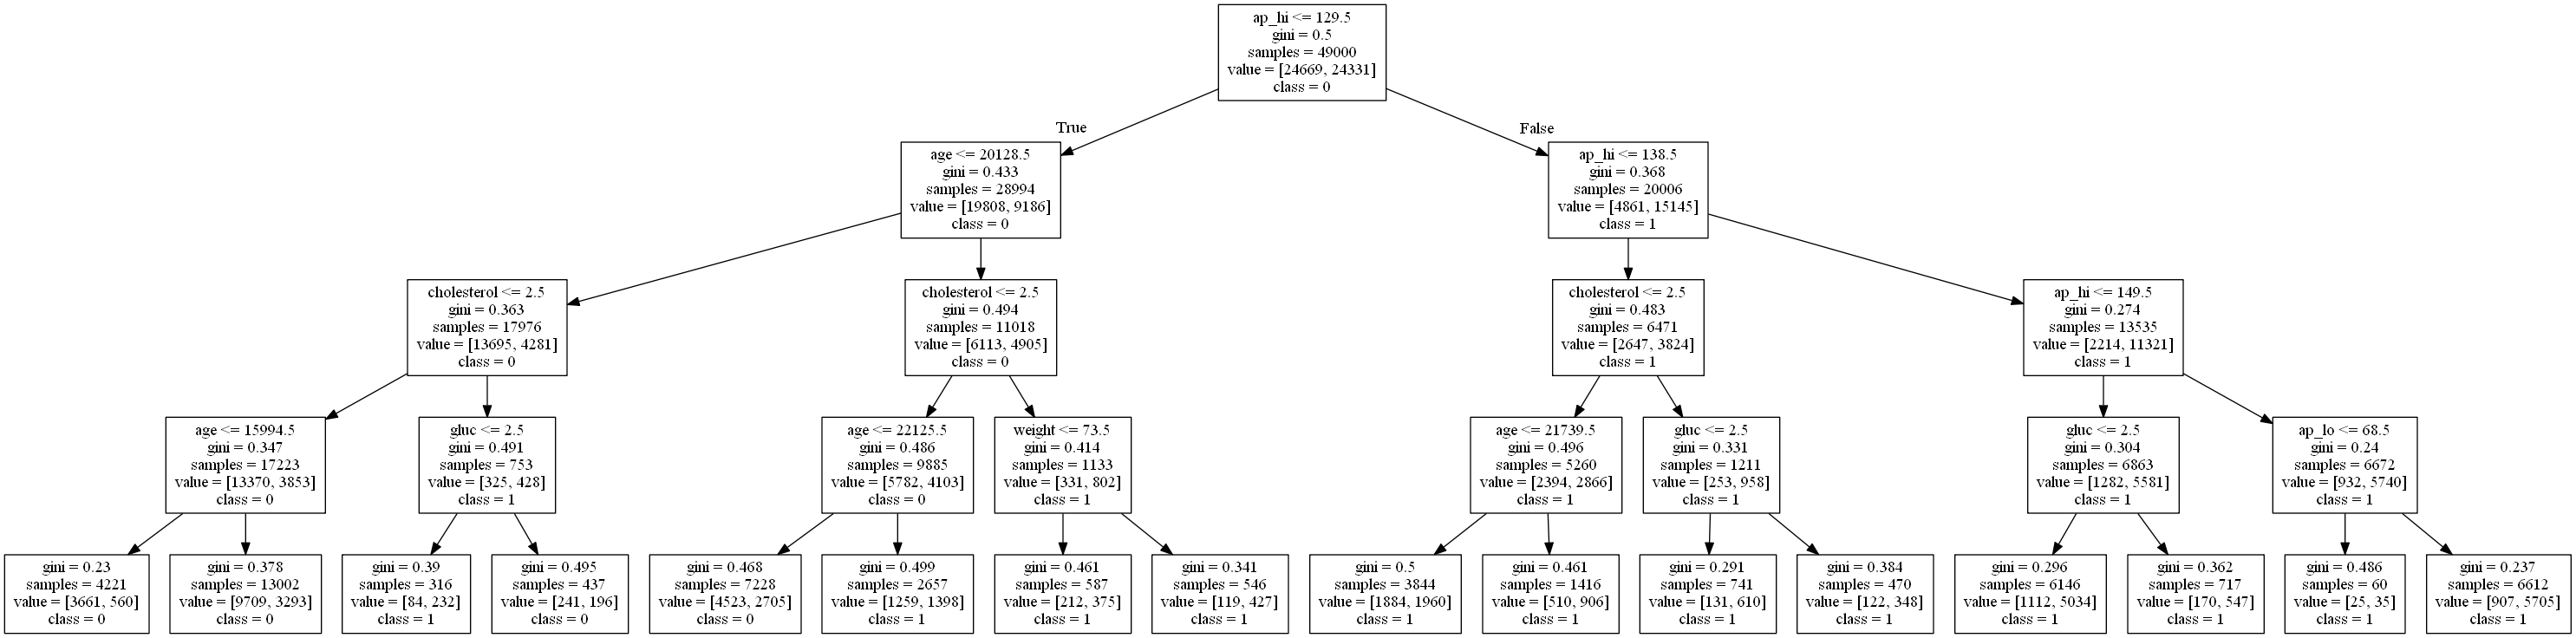

In [16]:
#The path_of_graph consists of all the paths that decision tree goes and also the node values
path_of_graph = tree.export_graphviz(classification_using_gini, out_file=None, feature_names = feature_columns, class_names=['0','1'])

# The below line will convert the paths to a graph
graph_gini = pydotplus.graph_from_dot_data(path_of_graph)  

# showing the decision tree
Image(graph_gini.create_png())

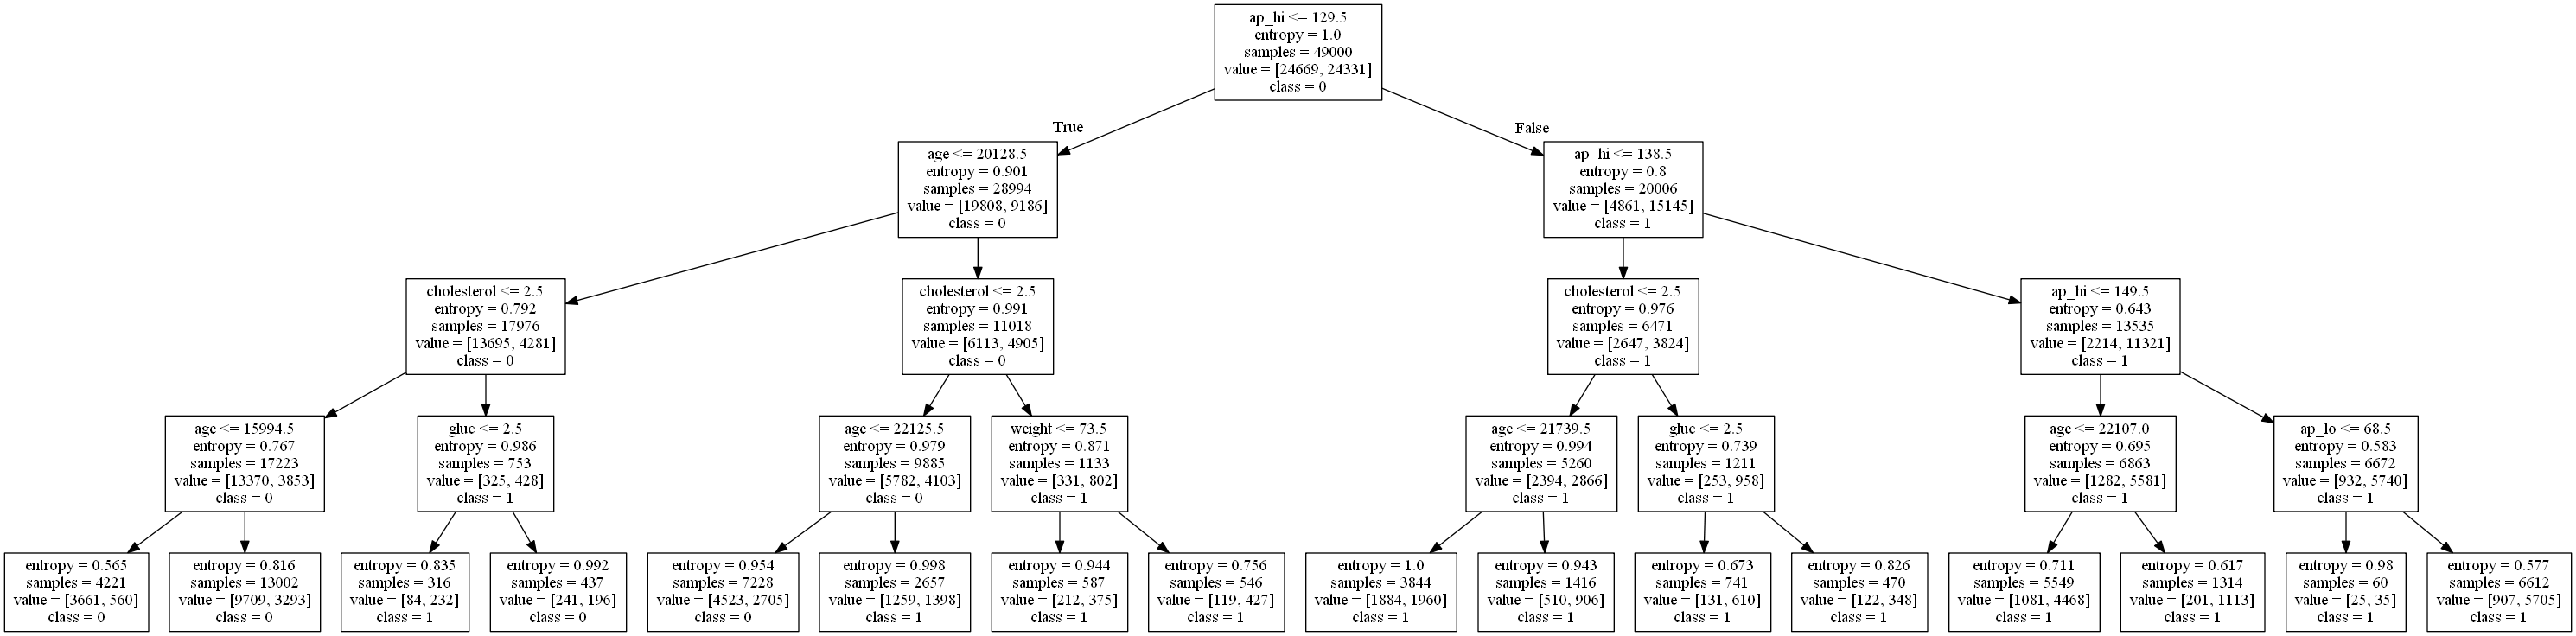

In [17]:
#The path_of_graph consists of all the paths that decision tree goes and also the node values
path_of_graph = tree.export_graphviz(classification_using_entropy, out_file=None, feature_names = feature_columns, class_names=['0','1'])

# The below line will convert the paths to a graph
graph_entropy = pydotplus.graph_from_dot_data(path_of_graph)  

# showing the decision tree
Image(graph_entropy.create_png())

In [20]:
gnbayes = GaussianNB() #using gaussin navie bayes classifier
gnbayes.fit(X_train, Y_train)   #training the model with the train datasets
  
# making predictions on the testing set 
Y_pred = gnbayes.predict(X_test) 
  
# comparing actual response values with predicted response values 
print("Naive Bayes model accuracy in percentage:", metrics.accuracy_score(Y_test, Y_pred)*100)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Naive Bayes model accuracy in percentage: 53.6
[[10006   346]
 [ 9398  1250]]
              precision    recall  f1-score   support

           0       0.52      0.97      0.67     10352
           1       0.78      0.12      0.20     10648

    accuracy                           0.54     21000
   macro avg       0.65      0.54      0.44     21000
weighted avg       0.65      0.54      0.44     21000



In [20]:
for i in range(1,71):
    classification_using_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = i, random_state = 0) 
  
    #Training the model
    classification_using_entropy.fit(X_train, Y_train) 
    Y_pred_entropy = classification_using_entropy.predict(X_test);#predicting the test values with the trained model
    print ("Accuracy : ",i, accuracy_score(Y_test,Y_pred_entropy)*100) 

Accuracy :  1 71.52380952380952
Accuracy :  2 71.52380952380952
Accuracy :  3 72.75238095238096
Accuracy :  4 73.03809523809524
Accuracy :  5 72.82857142857144
Accuracy :  6 72.95238095238096
Accuracy :  7 72.98571428571428
Accuracy :  8 72.73809523809524
Accuracy :  9 72.36666666666667
Accuracy :  10 72.28571428571429
Accuracy :  11 72.05714285714285
Accuracy :  12 71.9952380952381
Accuracy :  13 71.50952380952381
Accuracy :  14 71.11904761904762
Accuracy :  15 70.76190476190476
Accuracy :  16 70.22380952380952
Accuracy :  17 69.7952380952381
Accuracy :  18 69.4095238095238
Accuracy :  19 68.74761904761904
Accuracy :  20 68.75238095238096
Accuracy :  21 68.12857142857143
Accuracy :  22 67.51904761904763
Accuracy :  23 67.13333333333334
Accuracy :  24 66.96190476190476
Accuracy :  25 66.4
Accuracy :  26 66.07142857142857
Accuracy :  27 65.9095238095238
Accuracy :  28 65.56666666666666
Accuracy :  29 65.05238095238096
Accuracy :  30 64.74761904761904
Accuracy :  31 64.74285714285715
Acc

In [21]:
for i in range(1,71):
    classification_using_gini = DecisionTreeClassifier(criterion = "gini", max_depth=i, random_state = 0) 
  
    # Training the model
    classification_using_gini.fit(X_train, Y_train) 
    Y_pred_gini = classification_using_gini.predict(X_test); #predicting the test values with the trained model
    print ("Accuracy : ",i, accuracy_score(Y_test,Y_pred_gini)*100) 

Accuracy :  1 71.52380952380952
Accuracy :  2 71.52380952380952
Accuracy :  3 72.75238095238096
Accuracy :  4 73.03809523809524
Accuracy :  5 72.8142857142857
Accuracy :  6 72.93809523809523
Accuracy :  7 72.95238095238096
Accuracy :  8 72.6
Accuracy :  9 72.41428571428571
Accuracy :  10 72.39523809523808
Accuracy :  11 72.15238095238095
Accuracy :  12 71.75714285714285
Accuracy :  13 71.24761904761905
Accuracy :  14 70.86190476190475
Accuracy :  15 70.03809523809524
Accuracy :  16 69.7952380952381
Accuracy :  17 69.06666666666666
Accuracy :  18 68.66190476190475
Accuracy :  19 68.34761904761905
Accuracy :  20 67.79047619047618
Accuracy :  21 67.21904761904763
Accuracy :  22 66.83333333333333
Accuracy :  23 66.23333333333333
Accuracy :  24 66.02380952380953
Accuracy :  25 65.77619047619048
Accuracy :  26 65.28571428571428
Accuracy :  27 64.91428571428571
Accuracy :  28 64.68095238095238
Accuracy :  29 64.3952380952381
Accuracy :  30 64.29047619047618
Accuracy :  31 63.98571428571429
Ac